In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [10]:
# Load data
data = pd.read_csv('merged_stock_sentiment_data.csv')

# Prepare sequences for LSTM
sequence_length = 50  # Example sequence length
X, y = [], []

for i in range(sequence_length, len(data)):
    X.append(data[['Close', 'avg_sentiment']].iloc[i-sequence_length:i].values)
    y.append(data['Close'].iloc[i])

X, y = np.array(X), np.array(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (592, 50, 2)
X_test shape: (149, 50, 2)
y_train shape: (592,)
y_test shape: (149,)


In [11]:
# Check for NaN in the dataset
print("Checking for NaN values in the data...")
print(f"X_train has NaN: {np.isnan(X_train).any()}")
print(f"X_test has NaN: {np.isnan(X_test).any()}")
print(f"y_train has NaN: {np.isnan(y_train).any()}")
print(f"y_test has NaN: {np.isnan(y_test).any()}")

# If any NaN values are found, handle them
if np.isnan(X_train).any() or np.isnan(X_test).any() or np.isnan(y_train).any() or np.isnan(y_test).any():
    print("Handling NaN values...")
    # Replace NaN values with the mean or forward-fill/backward-fill
    X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
    X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))
    y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))
    y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))


Checking for NaN values in the data...
X_train has NaN: True
X_test has NaN: False
y_train has NaN: False
y_test has NaN: False
Handling NaN values...


In [12]:
# Recheck for NaN values
print("Rechecking for NaN values after handling...")
print(f"X_train has NaN: {np.isnan(X_train).any()}")
print(f"X_test has NaN: {np.isnan(X_test).any()}")
print(f"y_train has NaN: {np.isnan(y_train).any()}")
print(f"y_test has NaN: {np.isnan(y_test).any()}")


Rechecking for NaN values after handling...
X_train has NaN: False
X_test has NaN: False
y_train has NaN: False
y_test has NaN: False


Handling NaN values...


C:\conda_tmp\ipykernel_976\556074132.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Epoch 1/20


c:\ProgramData\anaconda3\envs\main_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.2877 - val_loss: 0.0440
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0238 - val_loss: 0.0104
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0085 - val_loss: 0.0048
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0024 - val_l

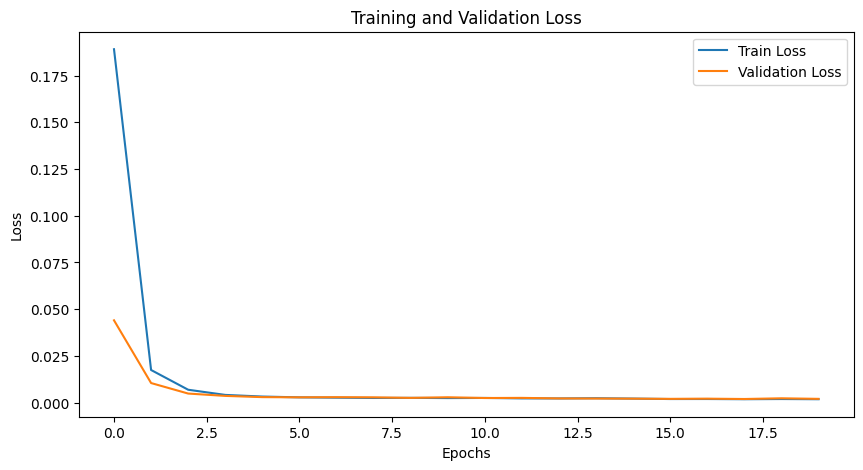

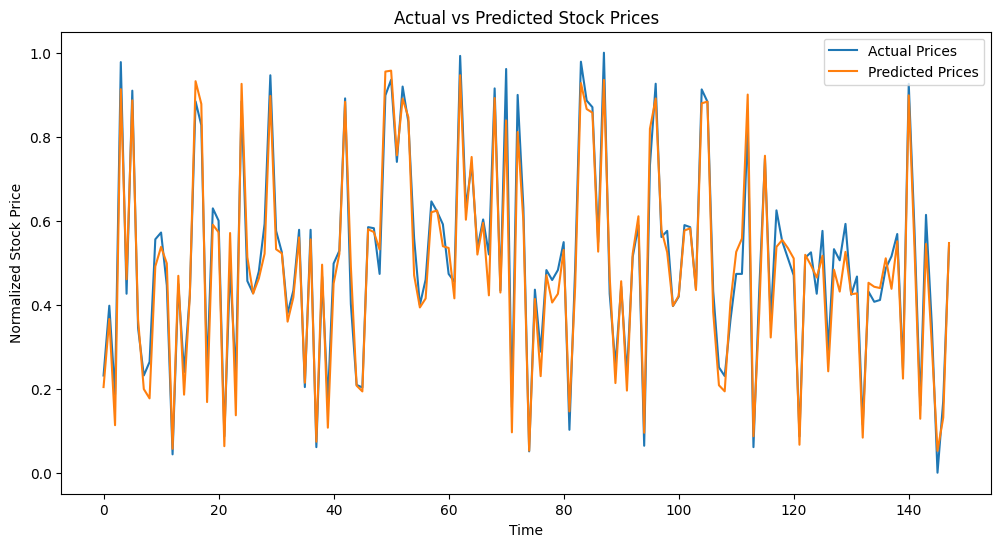

In [14]:
# Check for NaN and handle missing values
if data.isnull().sum().any():
    print("Handling NaN values...")
    data.fillna(method='ffill', inplace=True)

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
data[['Close', 'avg_sentiment']] = scaler.fit_transform(data[['Close', 'avg_sentiment']])

# Prepare sequences for LSTM
sequence_length = 50  # Number of previous time steps to consider
X, y = [], []
for i in range(sequence_length, len(data)):
    sequence = data[['Close', 'avg_sentiment']].iloc[i-sequence_length:i].values
    target = data['Close'].iloc[i]
    if not np.isnan(sequence).any() and not np.isnan(target):  # Skip if NaN
        X.append(sequence)
        y.append(target)

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)  # Output layer for predicting the stock price
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Compute Mean Squared Error
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(test_predictions, label='Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Normalized Stock Price')
plt.show()
